In [1]:
!pip install --upgrade pandas
!pip install google-cloud-bigquery-storage
!pip install --upgrade "google-cloud-bigquery[pandas]"

In [2]:
!pip install pyarrow

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [4]:
from google.cloud import bigquery

In [5]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="noble-freehold-302621-da5328bdc237.json"
client = bigquery.Client()

In [6]:
%load_ext google.cloud.bigquery

In [7]:
%%bigquery state_2018_5yr
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.state_2018_5yr`

Downloading: 100%|███████████████████████████████████████████████████████████████████| 52/52 [00:02<00:00, 21.21rows/s]


In [8]:
state_2018_5yr.shape

(52, 242)

In [9]:
for col in state_2018_5yr.columns:
    print(col)

geo_id
do_date
total_pop
households
male_pop
female_pop
median_age
male_under_5
male_5_to_9
male_10_to_14
male_15_to_17
male_18_to_19
male_20
male_21
male_22_to_24
male_25_to_29
male_30_to_34
male_35_to_39
male_40_to_44
male_45_to_49
male_50_to_54
male_55_to_59
male_60_to_61
male_62_to_64
male_65_to_66
male_67_to_69
male_70_to_74
male_75_to_79
male_80_to_84
male_85_and_over
female_under_5
female_5_to_9
female_10_to_14
female_15_to_17
female_18_to_19
female_20
female_21
female_22_to_24
female_25_to_29
female_30_to_34
female_35_to_39
female_40_to_44
female_45_to_49
female_50_to_54
female_55_to_59
female_60_to_61
female_62_to_64
female_65_to_66
female_67_to_69
female_70_to_74
female_75_to_79
female_80_to_84
female_85_and_over
white_pop
population_1_year_and_over
population_3_years_over
pop_5_years_over
pop_15_and_over
pop_16_over
pop_25_years_over
pop_25_64
pop_never_married
pop_now_married
pop_separated
pop_widowed
pop_divorced
not_us_citizen_pop
black_pop
asian_pop
hispanic_pop
amerindi

In [13]:
allStates_pop = state_2018_5yr['total_pop'].sum()
average_income =  ((state_2018_5yr['income_per_capita']*state_2018_5yr['total_pop']).sum())/allStates_pop
average_income

32411.262103872632

In [14]:
bins = [
    'income_less_10000',
    'income_10000_14999',
    'income_15000_19999',
    'income_20000_24999',
    'income_25000_29999',
    'income_30000_34999',
    'income_35000_39999',
    'income_40000_44999',
    'income_45000_49999',
    'income_50000_59999',
    'income_60000_74999',
    'income_75000_99999',
    'income_100000_124999',
    'income_125000_149999',
    'income_150000_199999',
    'income_200000_or_more'
]
binMiddle = [
    5000,
    12500,
    17500,
    22500,
    27500,
    32500,
    37500,
    42500,
    47500,
    55000,
    67500,
    87500,
    112500,
    137500,
    175000,
    300000
    
]
def median_income(obs):
    household=0
    for idx,bin in enumerate(bins):
        household+=obs[bin]
        if household >= obs['medianPoint']:
            return binMiddle[idx]
        
    
state_2018_5yr['medianPoint']=state_2018_5yr['households']/2

state_2018_5yr['stateMedian']=state_2018_5yr.apply(lambda row:median_income(row),axis=1)


In [16]:
state_2018_5yr['stateMedian'].mean()


60913.46153846154

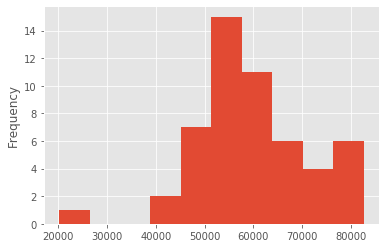

In [17]:
state_2018_5yr['median_income'].plot.hist()

In [ ]:
#Problem 1
-Rethink Median 
#Problem 2 
-Seperating States 
-Second Questions